In [1]:
from leftright_mccamley_py_master.Library import utils
from gaitlink.data import LabExampleDataset
import matplotlib.pyplot as plt
import numpy as np
from leftright_mccamley_py_master.Library import array_handling

In [2]:
example_data = LabExampleDataset()
example_data

,cohort,participant_id,time_measure,test,trial
0,HA,001,TimeMeasure1,Test5,Trial1
1,HA,001,TimeMeasure1,Test5,Trial2
2,HA,001,TimeMeasure1,Test11,Trial1
3,HA,002,TimeMeasure1,Test5,Trial1
4,HA,002,TimeMeasure1,Test5,Trial2
5,HA,002,TimeMeasure1,Test11,Trial1
6,MS,001,TimeMeasure1,Test5,Trial1
7,MS,001,TimeMeasure1,Test5,Trial2
8,MS,001,TimeMeasure1,Test11,Trial1


In [3]:
ha_example_data = example_data.get_subset(cohort="HA")
ha_example_data

,cohort,participant_id,time_measure,test,trial
0,HA,001,TimeMeasure1,Test5,Trial1
1,HA,001,TimeMeasure1,Test5,Trial2
2,HA,001,TimeMeasure1,Test11,Trial1
3,HA,002,TimeMeasure1,Test5,Trial1
4,HA,002,TimeMeasure1,Test5,Trial2
5,HA,002,TimeMeasure1,Test11,Trial1


In [20]:
single_test = ha_example_data.get_subset(participant_id="002", test="Test5", trial="Trial2")
single_test

,cohort,participant_id,time_measure,test,trial
0,HA,002,TimeMeasure1,Test5,Trial2


In [21]:
# Raw IMU data
imu_data = single_test.data["LowerBack"]
imu_data

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z
time,,,,,,
2020-08-21 10:30:50.479000064+00:00,9.260327,0.031613,-2.605737,-0.1608,0.2119,-0.3052
2020-08-21 10:30:50.489000192+00:00,9.271626,0.018003,-2.595759,-0.2712,-0.0757,-0.4693
2020-08-21 10:30:50.499000064+00:00,9.275198,0.040968,-2.617954,0.1157,-0.0892,-0.2648
2020-08-21 10:30:50.508999936+00:00,9.265379,0.046116,-2.616274,-0.0091,-0.2005,-0.3278
2020-08-21 10:30:50.519000064+00:00,9.270444,0.070599,-2.586713,0.0524,-0.2733,-0.0965
...,...,...,...,...,...,...
2020-08-21 10:30:58.239000064+00:00,9.165407,0.123421,-2.804246,1.1903,0.7700,0.2111
2020-08-21 10:30:58.249000192+00:00,9.149437,0.103341,-2.766177,1.3227,0.9281,0.4836
2020-08-21 10:30:58.259000064+00:00,9.156892,0.093647,-2.780554,0.9306,1.3176,0.1052


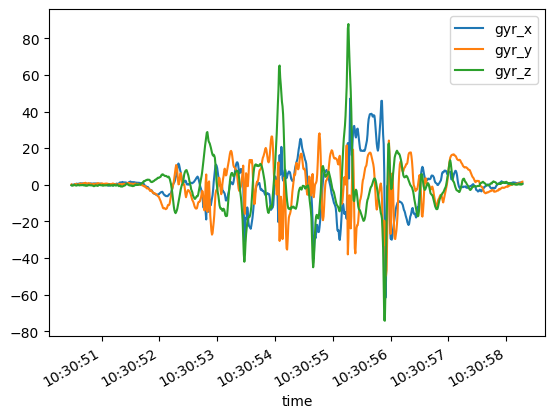

In [22]:
import matplotlib.pyplot as plt

imu_data.filter(like="gyr").plot()
plt.show()

In [25]:
# Test-level metadata:
samplig_rate = single_test.metadata.sampling_rate_hz

In [26]:
# participant_level metadata
single_test.participant_metadata

{'Height': 175.0,
 'Weight': 82.0,
 'SensorHeight': 108.0,
 'Handedness': 'R',
 'FootSize': 26.4,
 'WalkingAid_01': 0.0,
 'INDIP_DataUsed': 'All',
 'SensorType_SU': 'MM+',
 'SensorAttachment_SU': 'Body-Worn'}

### __Reference System Data__
___

In [27]:
# reference system data
# this is for all the tests/participants
example_data_with_reference = LabExampleDataset(reference_system="Stereophoto")
example_data_with_reference

,cohort,participant_id,time_measure,test,trial
0,HA,001,TimeMeasure1,Test5,Trial1
1,HA,001,TimeMeasure1,Test5,Trial2
2,HA,001,TimeMeasure1,Test11,Trial1
3,HA,002,TimeMeasure1,Test5,Trial1
4,HA,002,TimeMeasure1,Test5,Trial2
5,HA,002,TimeMeasure1,Test11,Trial1
6,MS,001,TimeMeasure1,Test5,Trial1
7,MS,001,TimeMeasure1,Test5,Trial2
8,MS,001,TimeMeasure1,Test11,Trial1


In [29]:
#
single_trial_with_reference = example_data_with_reference.get_subset(
    cohort="HA", participant_id="002", test="Test5", trial="Trial2"
)
single_trial_with_reference.reference_parameters_

{'lwb': [{'Start': 2.28,
   'End': 5.39,
   'StrideFrequency': 49.36164888953828,
   'Cadence': 98.72329777907656,
   'Duration': 3.11,
   'Length': 4.113706815831932,
   'LengthFeet': 3.990970590722213,
   'WalkingSpeed': 1.3727010349957065,
   'AverageStrideLength': 1.6696087035787461,
   'NumberStrides': 4.0,
   'TerminationReason': 'Pause',
   'Break_Start': array([], dtype=float64),
   'Break_End': array([], dtype=float64),
   'Break_Number': array([], dtype=float64),
   'Break_Duration': array([], dtype=float64),
   'Turning_Flag': 0.0,
   'Turn_Start': array([], dtype=float64),
   'Turn_End': array([], dtype=float64),
   'Turn_Duration': array([], dtype=float64),
   'Turn_Number': array([], dtype=float64),
   'Turn_Angle': array([], dtype=float64),
   'Turn_NumberStrides': array([], dtype=float64),
   'Turn_AngularVelocity': array([], dtype=float64),
   'Turn_PeakAngularVelocity': array([], dtype=float64),
   'Turn_MeanAngularVelocity': array([], dtype=float64),
   'Turn_Length'

### __Functional Interface__
____

In [241]:
from gaitlink.data import load_mobilised_matlab_format, get_all_lab_example_data_paths

all_example_data_paths = get_all_lab_example_data_paths()
list(all_example_data_paths.keys())

[('HA', '001'), ('HA', '002'), ('MS', '001')]

In [242]:
example_participant_path = all_example_data_paths[("HA", "002")]
data = load_mobilised_matlab_format(example_participant_path / "data.mat")
data

{('TimeMeasure1',
  'Test5',
  'Trial1'): MobilisedTestData(imu_data={'LowerBack':                                         acc_x     acc_y     acc_z   gyr_x  \
 time                                                                        
 2020-08-21 10:30:11.918999808+00:00  9.253377  0.175815 -2.696372  0.0054   
 2020-08-21 10:30:11.928999936+00:00  9.261510  0.168794 -2.699612  0.1081   
 2020-08-21 10:30:11.938999808+00:00  9.229707  0.225971 -2.694311  0.4369   
 2020-08-21 10:30:11.948999936+00:00  9.219089  0.228900 -2.709768  0.5355   
 2020-08-21 10:30:11.959000064+00:00  9.267368  0.219399 -2.681436  0.5266   
 ...                                       ...       ...       ...     ...   
 2020-08-21 10:30:19.548999936+00:00  9.264164  0.133812 -2.757315 -0.4151   
 2020-08-21 10:30:19.559000064+00:00  9.244774  0.124554 -2.794085 -0.4131   
 2020-08-21 10:30:19.568999936+00:00  9.271374  0.141495 -2.798781 -0.0446   
 2020-08-21 10:30:19.579000064+00:00  9.251400  0.144115 -2.

In [270]:
test_list = list(data.keys())
test_list

[('TimeMeasure1', 'Test5', 'Trial1'),
 ('TimeMeasure1', 'Test5', 'Trial2'),
 ('TimeMeasure1', 'Test11', 'Trial1')]

In [244]:
test_11_data = data[test_list[2]]
sampling_rate = test_11_data.metadata.sampling_rate_hz

In [245]:
# We can access the data of a single test by using the test name as key.
test_11_data = data[test_list[2]]
imu_data = test_11_data.imu_data["LowerBack"]
imu_data

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z
time,,,,,,
2020-08-21 10:50:00.388000+00:00,9.506652,0.014721,-1.251681,0.7467,0.0411,-0.2598
2020-08-21 10:50:00.398000128+00:00,9.508550,-0.003995,-1.255758,0.7143,-0.2051,-0.2739
2020-08-21 10:50:00.408000+00:00,9.522865,0.010142,-1.287486,0.5649,-0.0735,-0.4197
2020-08-21 10:50:00.417999872+00:00,9.509657,0.024649,-1.293958,0.3432,-0.0719,-0.2773
2020-08-21 10:50:00.428000+00:00,9.498548,0.053690,-1.239242,0.2914,-0.0606,-0.3616
...,...,...,...,...,...,...
2020-08-21 10:52:40.177999872+00:00,9.561574,0.635956,0.264192,-0.1136,-0.9987,-0.4929
2020-08-21 10:52:40.188000+00:00,9.588995,0.647659,0.269060,0.4132,-1.2662,-0.5346
2020-08-21 10:52:40.197999872+00:00,9.613343,0.659560,0.249716,0.5845,-1.0722,-0.2816


In [246]:
# load the reference data
data_with_reference = load_mobilised_matlab_format(example_participant_path / "data.mat", reference_system="INDIP")
data_with_reference.keys()

dict_keys([('TimeMeasure1', 'Test5', 'Trial1'), ('TimeMeasure1', 'Test5', 'Trial2'), ('TimeMeasure1', 'Test11', 'Trial1')])

In [247]:
data_with_reference['TimeMeasure1', 'Test11', 'Trial1']

# this is equivalent tp data_with_reference[test_list_2]

MobilisedTestData(imu_data={'LowerBack':                                         acc_x     acc_y     acc_z   gyr_x  \
time                                                                        
2020-08-21 10:50:00.388000+00:00     9.506652  0.014721 -1.251681  0.7467   
2020-08-21 10:50:00.398000128+00:00  9.508550 -0.003995 -1.255758  0.7143   
2020-08-21 10:50:00.408000+00:00     9.522865  0.010142 -1.287486  0.5649   
2020-08-21 10:50:00.417999872+00:00  9.509657  0.024649 -1.293958  0.3432   
2020-08-21 10:50:00.428000+00:00     9.498548  0.053690 -1.239242  0.2914   
...                                       ...       ...       ...     ...   
2020-08-21 10:52:40.177999872+00:00  9.561574  0.635956  0.264192 -0.1136   
2020-08-21 10:52:40.188000+00:00     9.588995  0.647659  0.269060  0.4132   
2020-08-21 10:52:40.197999872+00:00  9.613343  0.659560  0.249716  0.5845   
2020-08-21 10:52:40.208000+00:00     9.617620  0.654173  0.214529  0.2529   
2020-08-21 10:52:40.217999872+00:00

In [248]:
imu_data = data_with_reference[test_list[2]].imu_data['LowerBack']
imu_data

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z
time,,,,,,
2020-08-21 10:50:00.388000+00:00,9.506652,0.014721,-1.251681,0.7467,0.0411,-0.2598
2020-08-21 10:50:00.398000128+00:00,9.508550,-0.003995,-1.255758,0.7143,-0.2051,-0.2739
2020-08-21 10:50:00.408000+00:00,9.522865,0.010142,-1.287486,0.5649,-0.0735,-0.4197
2020-08-21 10:50:00.417999872+00:00,9.509657,0.024649,-1.293958,0.3432,-0.0719,-0.2773
2020-08-21 10:50:00.428000+00:00,9.498548,0.053690,-1.239242,0.2914,-0.0606,-0.3616
...,...,...,...,...,...,...
2020-08-21 10:52:40.177999872+00:00,9.561574,0.635956,0.264192,-0.1136,-0.9987,-0.4929
2020-08-21 10:52:40.188000+00:00,9.588995,0.647659,0.269060,0.4132,-1.2662,-0.5346
2020-08-21 10:52:40.197999872+00:00,9.613343,0.659560,0.249716,0.5845,-1.0722,-0.2816


In [249]:
data_with_reference[test_list[2]].reference_parameters['wb']

[{'Start': 4.86,
  'End': 11.31,
  'StrideFrequency': 46.38578212369496,
  'Cadence': 92.77156424738992,
  'Duration': 6.45,
  'Length': 3.062914904119568,
  'WalkingSpeed': 0.5573748084267212,
  'AverageStrideLength': 0.7474080405070523,
  'NumberStrides': 8.0,
  'Turning_Flag': 1.0,
  'TerminationReason': 'Pause',
  'Break_Start': array([], dtype=float64),
  'Break_End': array([], dtype=float64),
  'Break_Duration': array([], dtype=float64),
  'Break_Number': 0.0,
  'Turn_Start': 6.22,
  'Turn_End': 10.49,
  'Turn_Duration': 4.2700000000000005,
  'Turn_Number': 1.0,
  'Turn_Angle': -135.4261190422371,
  'Turn_NumberStrides': 8.0,
  'Turn_AngularVelocity': array([ 5.16168093e+00,  3.67212495e+00,  2.16390229e+00,  6.42829697e-01,
         -8.85387656e-01, -2.41520270e+00, -3.94127114e+00, -5.45849366e+00,
         -6.96205537e+00, -8.44746186e+00, -9.91057165e+00, -1.13476248e+01,
         -1.27552674e+01, -1.41305718e+01, -1.54710529e+01, -1.67746795e+01,
         -1.80398821e+01, -1

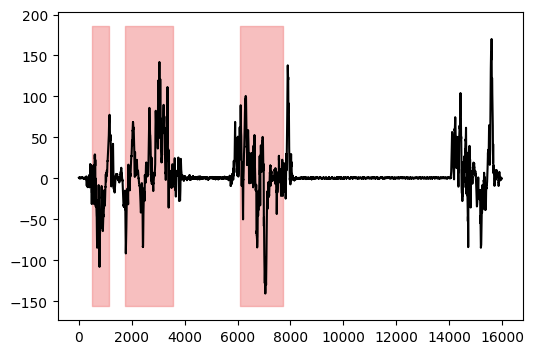

In [250]:
gyr_v = imu_data.loc[:, 'gyr_x'].to_numpy()

# gait sequences GSs
gs_start = [data_with_reference[test_list[2]].reference_parameters['lwb'][gs]['Start'] for gs in range(len(data_with_reference[test_list[2]].reference_parameters['lwb']))]
gs_end = [data_with_reference[test_list[2]].reference_parameters['lwb'][gs]['End'] for gs in range(len(data_with_reference[test_list[2]].reference_parameters['lwb']))]

# initial contacts within the GSs
reference_ics = [data_with_reference[test_list[2]].reference_parameters['lwb'][gs]['InitialContact_Event'] for gs in range(len(data_with_reference[test_list[2]].reference_parameters['lwb']))]
ground_truth_ics = [data_with_reference[test_list[2]].reference_parameters['lwb'][gs]['InitialContact_LeftRight'] for gs in range(len(data_with_reference[test_list[2]].reference_parameters['lwb']))]

plt.figure(figsize = (6, 4))
plt.plot(gyr_v, color = 'black')

# get y_limits
ax = plt.gca()
ylimits = ax.get_ylim()

for i in range(len(gs_start)):
    plt.fill_between(x = np.linspace(gs_start[i], gs_end[i], 10) * samplig_rate,
                    y1 = ylimits[0],
                    y2 = ylimits[1],
                    color = 'lightcoral',
                    alpha = 0.5)

In [251]:
ground_truth_ics[0] == 'Left'

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False])

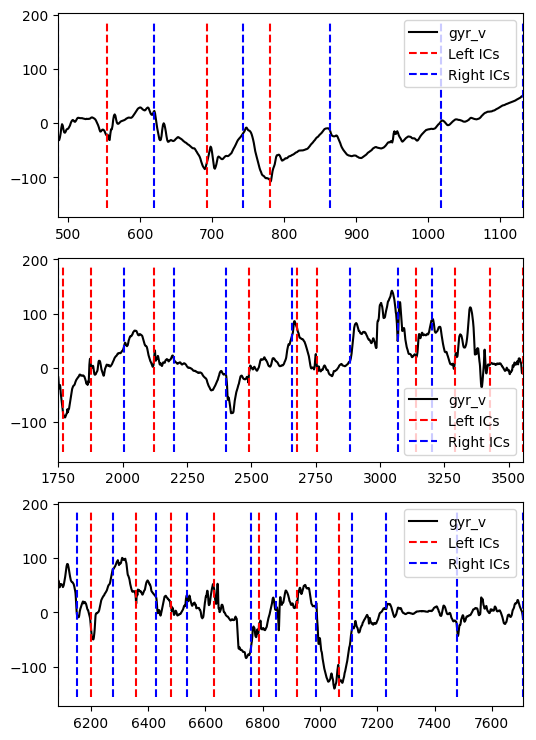

In [252]:
# plot ICs
plt.figure(figsize = (6, 9))

for gs in range(len(gs_start)):
    plt.subplot(3, 1, gs + 1)
    plt.plot(gyr_v, color = 'black', label = 'gyr_v')
    plt.xlim(gs_start[gs] * sampling_rate, gs_end[gs] * sampling_rate)

    plt.vlines(reference_ics[gs][ground_truth_ics[gs] == 'Left'] * samplig_rate, ymin = ylimits[0], ymax = ylimits[1], color = 'red', linestyles = 'dashed', label = 'Left ICs' )
    plt.vlines(reference_ics[gs][ground_truth_ics[gs] == 'Right'] * samplig_rate, ymin = ylimits[0], ymax = ylimits[1], color = 'blue', linestyles = 'dashed', label = 'Right ICs')
    plt.legend()

In [223]:
# i really do not believe that the reference data is great, and neither is the choice of example data.

### __Easier Example?__
____
For __HA, , id = 002__:
* INDIP reference data is only available for the third test:
    * ('TimeMeasure1', 'Test11', 'Trial1')
* Stereophoto reference data is only available for the second and third tests:
    * ('TimeMeasure1', 'Test5', 'Trial2'),
    * ('TimeMeasure1', 'Test11', 'Trial1')

In [292]:
from gaitlink.data import load_mobilised_matlab_format, get_all_lab_example_data_paths

subject = ("HA", "001")

all_example_data_paths = get_all_lab_example_data_paths()
example_participant_path = all_example_data_paths[subject]
data_with_reference_stereo = load_mobilised_matlab_format(example_participant_path / "data.mat", reference_system="Stereophoto")
data_with_reference_indip = load_mobilised_matlab_format(example_participant_path / "data.mat", reference_system="INDIP")

test_list = list(data_with_reference_stereo.keys())
test_list


[('TimeMeasure1', 'Test5', 'Trial1'),
 ('TimeMeasure1', 'Test5', 'Trial2'),
 ('TimeMeasure1', 'Test11', 'Trial1')]

In [293]:
# stereo data check
print('Stereo reference data:')
for test_no in range(len(test_list)):
    no_gs = len(data_with_reference_stereo[test_list[test_no]].reference_parameters['lwb'])
    print(f'For test {test_list[test_no]}, there are {no_gs} GS detected.')
print('\n')
print('INDIP reference data:')
for test_no in range(len(test_list)):
    no_gs = len(data_with_reference_indip[test_list[test_no]].reference_parameters['lwb'])
    print(f'For test {test_list[test_no]}, there are {no_gs} GS detected.')

Stereo reference data:
For test ('TimeMeasure1', 'Test5', 'Trial1'), there are 1 GS detected.
For test ('TimeMeasure1', 'Test5', 'Trial2'), there are 1 GS detected.
For test ('TimeMeasure1', 'Test11', 'Trial1'), there are 6 GS detected.


INDIP reference data:
For test ('TimeMeasure1', 'Test5', 'Trial1'), there are 1 GS detected.
For test ('TimeMeasure1', 'Test5', 'Trial2'), there are 1 GS detected.
For test ('TimeMeasure1', 'Test11', 'Trial1'), there are 6 GS detected.


Ok, so let's check the case where we have stereophoto data, and just one gait sequence detected.

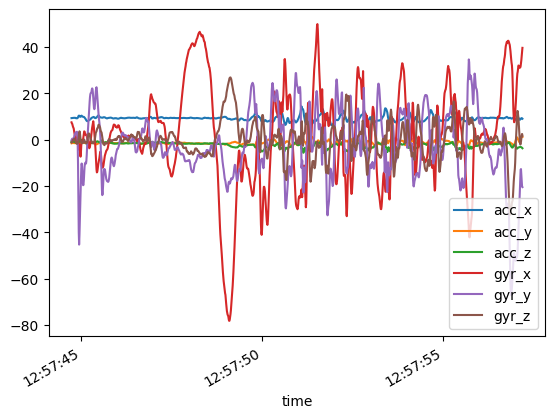

In [294]:
example_participant_path = all_example_data_paths[subject]
data_with_reference = load_mobilised_matlab_format(example_participant_path / "data.mat", reference_system="INDIP")

# notes: the stereophoto IC reference data for HA, 002, test_list[1] is not great

test_list = list(data_with_reference_stereo.keys())
test_no = 0

imu_data = data_with_reference[test_list[test_no]].imu_data['LowerBack']

# get the sampling rate
sampling_rate = data_with_reference[test_list[test_no]].metadata.sampling_rate_hz

imu_data.plot()
plt.legend(loc = 'lower right')

In [295]:
data_with_reference[test_list[test_no]].reference_parameters['lwb'][0]

{'Start': 5.05,
 'End': 9.88,
 'StrideFrequency': 50.25735855800588,
 'Cadence': 100.51471711601177,
 'Duration': 4.830000000000001,
 'Length': 5.0123235091487235,
 'WalkingSpeed': 1.059831047477268,
 'AverageStrideLength': 1.2638368816538175,
 'NumberStrides': 7.0,
 'Turning_Flag': 0.0,
 'TerminationReason': 'Pause',
 'Break_Start': array([], dtype=float64),
 'Break_End': array([], dtype=float64),
 'Break_Duration': array([], dtype=float64),
 'Break_Number': 0.0,
 'Turn_Start': array([], dtype=float64),
 'Turn_End': array([], dtype=float64),
 'Turn_Duration': array([], dtype=float64),
 'Turn_Number': 0.0,
 'Turn_Angle': array([], dtype=float64),
 'Turn_NumberStrides': array([], dtype=float64),
 'Turn_AngularVelocity': array([], dtype=float64),
 'Turn_PeakAngularVelocity': array([], dtype=float64),
 'Turn_MeanAngularVelocity': array([], dtype=float64),
 'Turn_Length': array([], dtype=float64),
 'Stride_InitialContacts': array([[505., 632.],
        [574., 692.],
        [632., 747.],
 

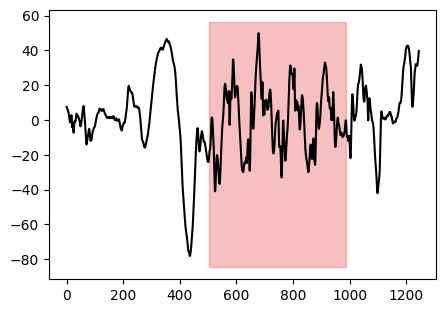

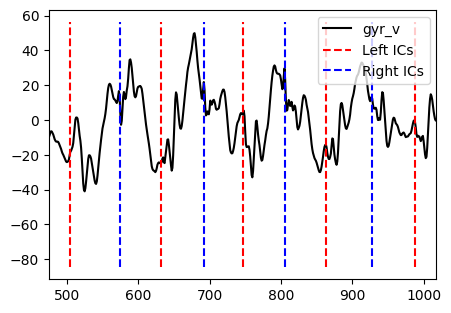

In [300]:
signal = imu_data.loc[:, 'gyr_x'].to_numpy()

# gait sequences GSs
gs_start = [data_with_reference[test_list[test_no]].reference_parameters['lwb'][gs]['Start'] for gs in range(len(data_with_reference[test_list[test_no]].reference_parameters['lwb']))]
gs_end = [data_with_reference[test_list[test_no]].reference_parameters['lwb'][gs]['End'] for gs in range(len(data_with_reference[test_list[test_no]].reference_parameters['lwb']))]

# initial contacts within the GSs
reference_ics = [data_with_reference[test_list[test_no]].reference_parameters['lwb'][gs]['InitialContact_Event'] for gs in range(len(data_with_reference[test_list[test_no]].reference_parameters['lwb']))]
ground_truth_ics = [data_with_reference[test_list[test_no]].reference_parameters['lwb'][gs]['InitialContact_LeftRight'] for gs in range(len(data_with_reference[test_list[test_no]].reference_parameters['lwb']))]

# any turns?
turns = np.round([data_with_reference[test_list[test_no]].reference_parameters['lwb'][gs]['Turning_Flag'] for gs in range(len(data_with_reference[test_list[test_no]].reference_parameters['lwb']))]).astype(int)


plt.figure(figsize = (5, 3.5))
plt.plot(signal, color = 'black')

# get y_limits
ax = plt.gca()
ylimits = ax.get_ylim()

for gs in range(len((gs_start))):
    plt.fill_between(x = np.linspace(gs_start[gs], gs_end[gs], 10) * sampling_rate,
                    y1 = ylimits[0],
                    y2 = ylimits[1],
                    color = 'lightcoral',
                    alpha = 0.5)

if len(gs_start) == 1:
    plt.figure(figsize = (5, 3.5))
else:
    plt.figure(figsize = (5, 5.5))
for gs in range(len(gs_start)):
    plt.subplot(len(gs_start), 1, gs + 1)
    plt.plot(signal, color = 'black', label = 'gyr_v')
    plt.xlim(gs_start[gs] * sampling_rate - 30, gs_end[gs] * sampling_rate + 30)

    plt.vlines(reference_ics[gs][ground_truth_ics[gs] == 'Left'] * sampling_rate, ymin = ylimits[0], ymax = ylimits[1], color = 'red', linestyles = 'dashed', label = 'Left ICs' )
    plt.vlines(reference_ics[gs][ground_truth_ics[gs] == 'Right'] * sampling_rate, ymin = ylimits[0], ymax = ylimits[1], color = 'blue', linestyles = 'dashed', label = 'Right ICs')
    plt.legend(loc = 'upper right')

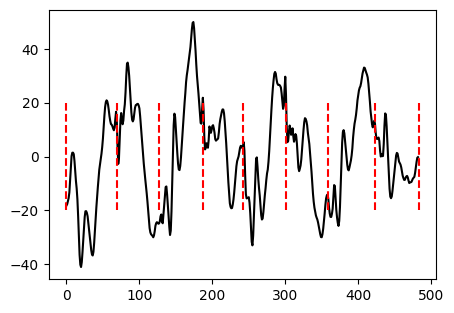

In [306]:
signal = imu_data.loc[:, 'gyr_x'].to_numpy()

gs_no = 0
start = np.round(gs_start[gs_no] * sampling_rate).astype(int)
end = np.round(gs_end[gs_no] * sampling_rate).astype(int)

# Check for NaNs, if present throw error.
nans = np.isnan(reference_ics[0])
assert all(item == False for item in nans), 'NaN instances present in the IC list provided. This will result in errors.'

corrected_ics = np.round(reference_ics[gs_no] * sampling_rate).astype(int) - start
# corrected_ics[nans] = np.nan()

plt.figure(figsize = (5, 3.5))
plt.plot(signal[start : end], 'k-')
plt.vlines(corrected_ics, ymin = -20, ymax = 20, colors='red', linestyles='dashed')

# This seems to be fine.

In [313]:
# original McCamley code
# axis_config = "Vertical"
# axis_config = "Anterior-Posterior"
axis_config = "Combined"

if axis_config == "Vertical":
    signal = imu_data.loc[:, 'gyr_x'].to_numpy()
elif axis_config == "Anterior-Posterior":
    signal = imu_data.loc[:, 'gyr_z'].to_numpy() * -1 # invert the sign here
elif axis_config == "Combined":
    signal = (imu_data.loc[:, 'gyr_z'].to_numpy() * -1) + imu_data.loc[:, 'gyr_x'].to_numpy()

ic_list_samples = np.round((reference_ics[0] * sampling_rate).astype(int))

if ic_list_samples[-1] > len(signal):
    print('edge case 1')
    ic_list_samples[-1] = len(signal) - 1

if len(ic_list_samples) >= 2 and ic_list_samples[-2] >= len(signal):
    print('edge case 2')
    ic_list_samples[-2] = len(signal) - 2

sig = signal - np.mean(signal)
cutoff_freq = 2
sig_filtered = utils._butter_lowpass_filter(sig, cutoff= cutoff_freq, sampling_rate_hz= sampling_rate)

ic_left_right = np.where(sig_filtered[ic_list_samples] <= 0, "L", "R")

print(ic_left_right)
print(ground_truth_ics[0])

# Ok, so this is shit, this was supposed to be an alternating pattern; L, R, L, R, L, R...

['L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L']
['Left' 'Right' 'Left' 'Right' 'Left' 'Right' 'Left' 'Right' 'Left']


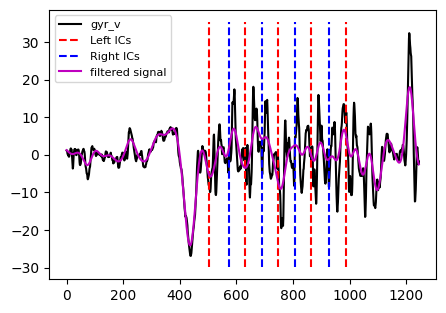

In [308]:
plt.figure(figsize = (5, 3.5))

plt.plot(signal, color = 'black', label = 'gyr_v')

ax = plt.gca()
ylimits = ax.get_ylim()

plt.vlines(reference_ics[0][ground_truth_ics[0] == 'Left'] * sampling_rate,
           ymin = ylimits[0],
           ymax = ylimits[1],
           color = 'red',
           linestyles = 'dashed',
           label = 'Left ICs' )

plt.vlines(reference_ics[0][ground_truth_ics[0] == 'Right'] * sampling_rate,
           ymin = ylimits[0],
           ymax = ylimits[1],
           color = 'blue',
           linestyles = 'dashed',
           label = 'Right ICs')

plt.plot(sig_filtered, 'm-', label = 'filtered signal')
plt.legend(fontsize = 8)

In [309]:
# How about some improvements?
# How about a bandpass filter?

lower_band = 0.5
upper_band = 2
sig_filtered_2 = utils._butter_bandpass_filter(signal, 
                                        lower_bound = lower_band,
                                        upper_bound = upper_band,
                                        sampling_rate_hz = sampling_rate)

ic_left_right_2 = np.where(sig_filtered_2[ic_list_samples] <= 0, "L", "R")
print(ic_left_right_2)
print(ground_truth_ics[0])

# Still crap! - the original McCamley algo is not working well with this data at all.

['L' 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'R']
['Left' 'Right' 'Left' 'Right' 'Left' 'Right' 'Left' 'Right' 'Left']


In [1]:
# Implementing Ullrich's improvements.

version = "snap_to_extremum"
# version = "consistency_check"

ic_list_samples = np.round(reference_ics[0] * sampling_rate).astype(int)

if ic_list_samples[-1] >= len(signal):
    ic_list_samples[-1] = len(signal) - 1

lowpass_cut_off_hz = 2
signal_filtered = utils._butter_lowpass_filter(signal,
                                        lowpass_cut_off_hz,
                                        sampling_rate)

# TODO: fine tune these parameters, 30 & 30 seems to work just fine, but this does not seem ideal.
radius_left = 15
radius_right = 30

if version == "snap_to_extremum":
     # find extrema of absolute signal via function
    gyr_yaw_abs = abs(signal_filtered)

    extrema = array_handling.find_extrema_in_radius(gyr_yaw_abs, ic_list_samples, radius_left, radius_right, "max")
    ic_left_right_improved = np.where(signal_filtered[extrema]<=0, "L", "R")
    
    print(ic_left_right_improved)

if version == "consistency_check":

    ic_left_right = np.where(signal_filtered[ic_list_samples]<=0, "L", "R")
    ic_left_right_01 = np.where(signal_filtered[ic_list_samples]<=0, 0, 1)

    # TODO idea: check where L R L R pattern in broken and only improve in those situations
    ic_left_right_01_diff = np.diff(ic_left_right_01)
    # the diff is 0 is two subsequent steps are assigned to the same foot
    consistency_check = np.where(ic_left_right_01_diff == 0)[0]

    # if consistency_check.size == 0:
    #     ic_left_right

    k = 1
    max_loops = 100
    while consistency_check.size != 0 and k < max_loops:
        
        # print(f'Loop {k}')
        # print(np.where(signal_filtered[ic_list_samples]<=0, 0, 1))
        # print(np.diff(np.where(signal_filtered[ic_list_samples]<=0, 0, 1)))
        # print("\n")
    
        # find extrema of absolute signal via function
        signal_abs = abs(signal_filtered)
    
        extrema = array_handling.find_extrema_in_radius(signal_abs,
                                                        ic_list_samples,
                                                        radius_left,
                                                        radius_right,
                                                        "max")
        ic_left_right_improved = np.where(signal_filtered[extrema]<=0, "L", "R")
    
        ic_left_right_improved_01 = np.where(signal_filtered[extrema]<=0, 0, 1)
        ic_left_right_improved_01_diff = np.diff(ic_left_right_improved_01)

        consistency_check = np.where(ic_left_right_improved_01_diff == 0)[0]
        
        k += 1
        
    print(ic_left_right_improved)
    
# TODO: This seems to be running forever, you need to have a stopping criteria, somehow.
print(ground_truth_ics[0])

NameError: name 'np' is not defined

In [ ]:
# Ok, so this seems to be running locally now! Perfect! :)